# twissed

* Author: D. Minenna
* Date: January 2024

Tutorial on using the twissed package.
In this notebook, we are presenting the input/output to TraceWin.

## Import
The import of the package is done by the command:
```python
import twissed
```

In [1]:
# Main packages
import os
import numpy as np
import matplotlib.pyplot as plt

# twissed
import twissed

# Select color maps
cm = twissed.Cmap()


 twissed (v2.1.1, 2023/01/25)



In [2]:
# Selection of the directory with data
directory = os.getcwd() + '/data/FBPIC/lab_diags'

# Find all timesteps
steps = twissed.Steps()
steps.find_data(directory=directory,source='fbpic',verbose=False)

# timestep selection
timestep = steps.timesteps[-1]

#Creation of the step class
step = twissed.Step()

# Read data 
step = twissed.fbpic_particle(step,directory,timestep,species='electrons',verbose=False)

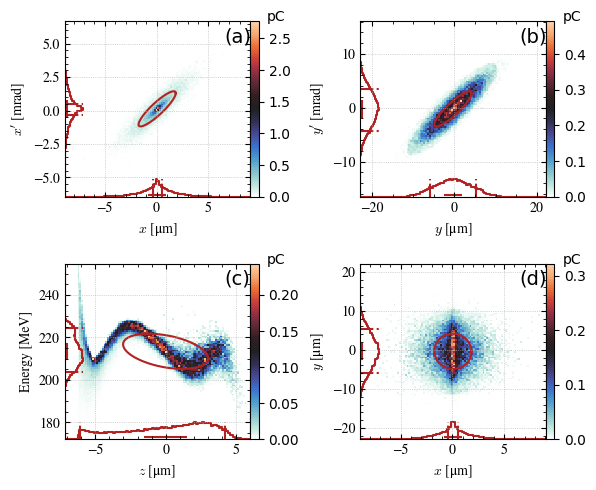

In [3]:
_ = step.plot_beam(
  range_auto=True,
)

# Redistrubution to remove the weight variation of the macro-particles

Now, we use the ```remove_weight``` function to generate a new **step** class with particle having the same weight (```weight_norm```).

In [4]:
step_new = twissed.noweight(step,weight_norm=1000,verbose=True)

Nparticle  Old: 174788, New: 676740
Emittance x - Old: 0.445346928449047, New: 0.4512155752953072
Emittance y - Old: 2.8178741554952444, New: 2.827383220169685
Energy mean - Old: 213.4097256232794, New: 213.41132102431263
Charge - Old: 108.4155653979033, Saved: 108.42570152931599, New: 108.41556539790342


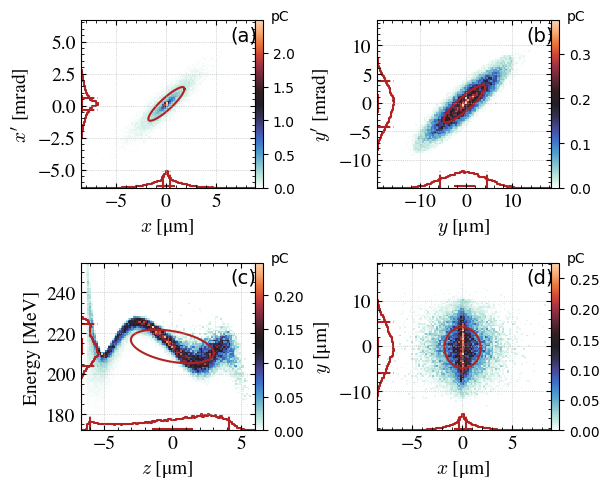

In [5]:
_ = step_new.plot_beam(
  range_auto=True,
)

In [6]:
step.print('sigma_matrix')

   x (m)| 3.21401e-12 2.10182e-09 -1.18242e-13 1.20527e-11 1.37587e-13 -2.68716e-09 |
x' (rad)| 2.10182e-09 1.72662e-06 2.97261e-11 4.95055e-08 -4.65404e-11 -9.89257e-07 |
   y (m)| -1.18242e-13 2.97261e-11 2.02655e-11 1.30708e-08 4.30263e-13 -1.80910e-09 |
y' (rad)| 1.20527e-11 4.95055e-08 1.30708e-08 1.06662e-05 1.98567e-10 -2.81583e-06 |
   z (m)| 1.37587e-13 -4.65404e-11 4.30263e-13 1.98567e-10 9.16077e-12 -4.62783e-08 |
    dp/p| -2.68716e-09 -9.89257e-07 -1.80910e-09 -2.81583e-06 -4.62783e-08 1.49454e-03 |


In [7]:
step_new.print('sigma_matrix')

   x (m)| 3.25086e-12 2.11112e-09 -1.78439e-13 -6.02162e-12 1.42181e-13 -2.47920e-09 |
x' (rad)| 2.11112e-09 1.72833e-06 1.15085e-11 4.40615e-08 -4.39331e-11 -9.10609e-07 |
   y (m)| -1.78439e-13 1.15085e-11 2.03074e-11 1.30779e-08 4.29122e-13 -1.89136e-09 |
y' (rad)| -6.02162e-12 4.40615e-08 1.30779e-08 1.06684e-05 1.95158e-10 -2.90254e-06 |
   z (m)| 1.42181e-13 -4.39331e-11 4.29122e-13 1.95158e-10 9.16379e-12 -4.62892e-08 |
    dp/p| -2.47920e-09 -9.10609e-07 -1.89136e-09 -2.90254e-06 -4.62892e-08 1.49599e-03 |


In [8]:
(step.sigma_matrix - step_new.sigma_matrix)/step.sigma_matrix * 100

array([[-1.14654198e+00, -4.42697812e-01, -5.09095762e+01,
         1.49960822e+02, -3.33879820e+00,  7.73905898e+00],
       [-4.42697812e-01, -9.94226441e-02,  6.12847135e+01,
         1.09967074e+01,  5.60225870e+00,  7.95018083e+00],
       [-5.09095762e+01,  6.12847135e+01, -2.06546932e-01,
        -5.43525789e-02,  2.64971245e-01, -4.54697221e+00],
       [ 1.49960822e+02,  1.09967074e+01, -5.43525789e-02,
        -2.07473233e-02,  1.71687943e+00, -3.07921208e+00],
       [-3.33879820e+00,  5.60225870e+00,  2.64971245e-01,
         1.71687943e+00, -3.29752912e-02, -2.35702963e-02],
       [ 7.73905898e+00,  7.95018083e+00, -4.54697221e+00,
        -3.07921208e+00, -2.35702963e-02, -9.68977239e-02]])

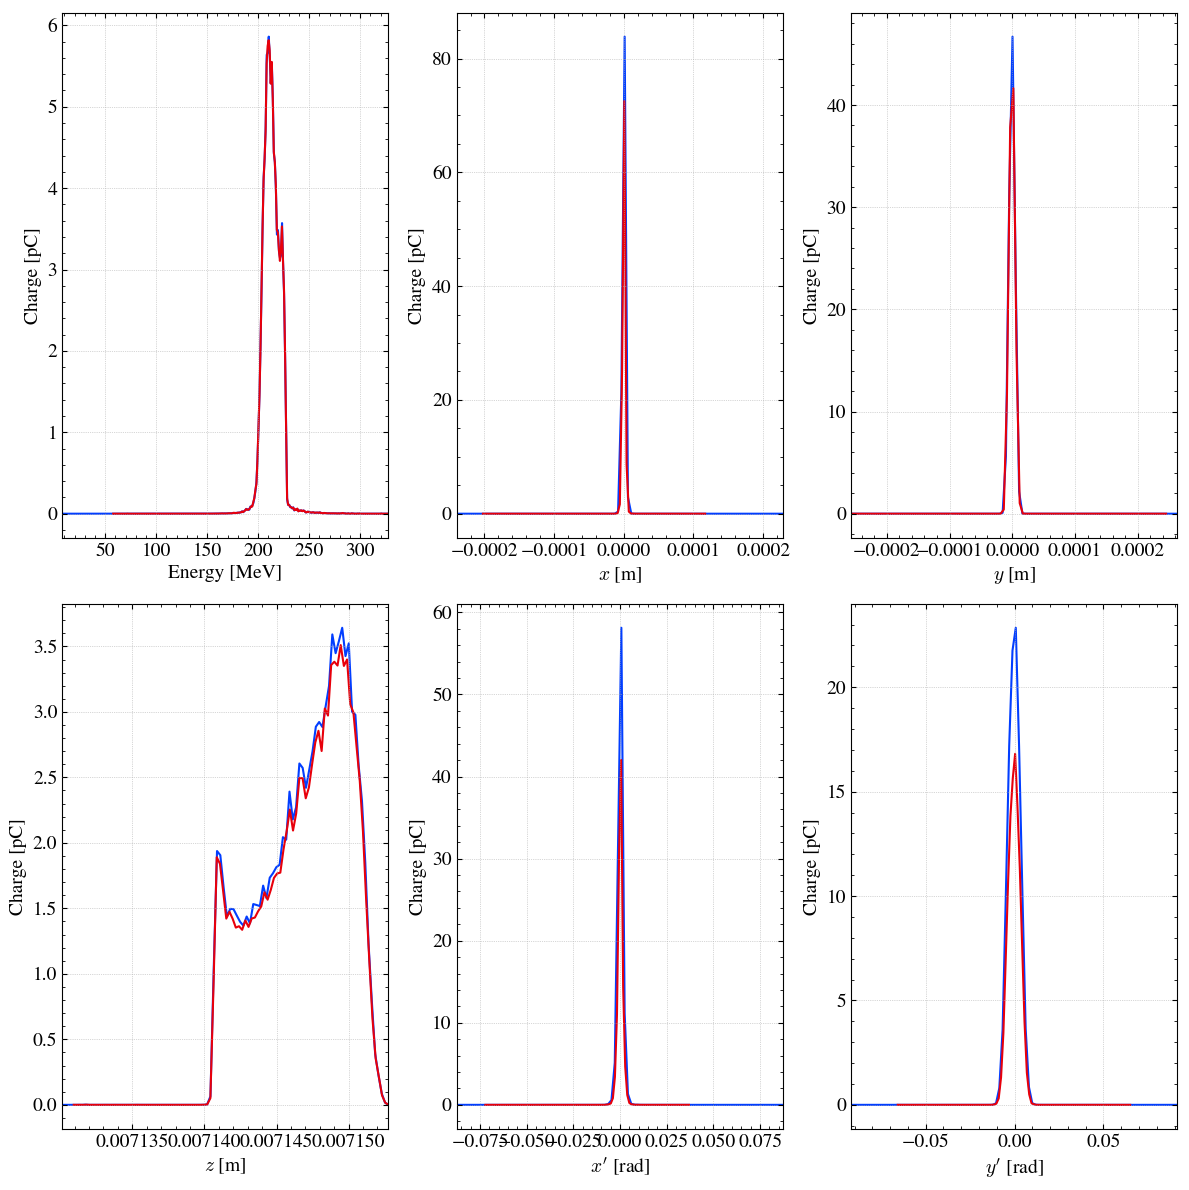

In [9]:
with plt.rc_context(twissed.rcParams):
    fig, axs = plt.subplots(2,3,figsize=(12,12))

ax = axs[0,0]
_ = step.hist1D('Ek',dx=1,plot='plot',ax=ax,fwhm=False)
_ = step_new.hist1D('Ek',dx=1,plot='plot',ax=ax,fwhm=False)

ax = axs[0,1]
_ = step.hist1D('x',plot='plot',ax=ax,fwhm=False)
_ = step_new.hist1D('x',plot='plot',ax=ax,fwhm=False)

ax = axs[0,2]
_ = step.hist1D('y',plot='plot',ax=ax,fwhm=False)
_ = step_new.hist1D('y',plot='plot',ax=ax,fwhm=False)

ax = axs[1,0]
_ = step.hist1D('z',plot='plot',ax=ax,fwhm=False)
_ = step_new.hist1D('z',plot='plot',ax=ax,fwhm=False)

ax = axs[1,1]
_ = step.hist1D('xp',plot='plot',ax=ax,fwhm=False)
_ = step_new.hist1D('xp',plot='plot',ax=ax,fwhm=False)

ax = axs[1,2]
_ = step.hist1D('yp',plot='plot',ax=ax,fwhm=False)
_ = step_new.hist1D('yp',plot='plot',ax=ax,fwhm=False)

In [10]:
freq = 1e9 #Hz 

twissed.write_dst(step_new,"tracewin.dst",freq)

INFO: .dst file tracewin.dst wrote with N particle: 676740.


## Read dst

In [11]:
step_dst = twissed.read_dst("tracewin.dst", charge=step.charge)

INFO: .dst file read with N particle: 676740 and charge 108.4155653979033


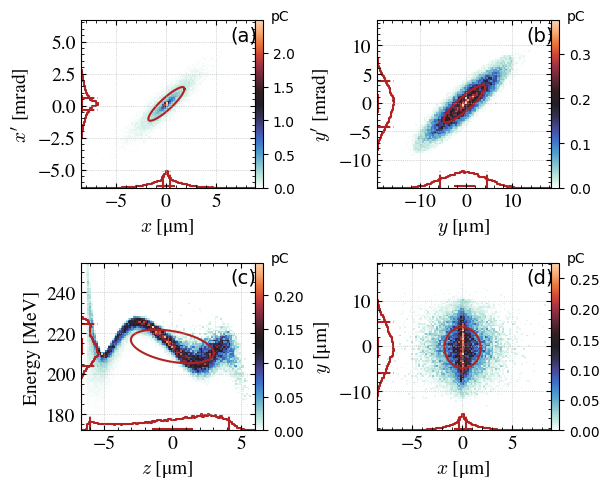

In [12]:
_ = step_new.plot_beam(
  range_auto=True,
)

In [14]:
step = twissed.read_dst("data/tracewin.dst", charge=step.charge)

INFO: .dst file read with N particle: 676898 and charge 108.4155653979033


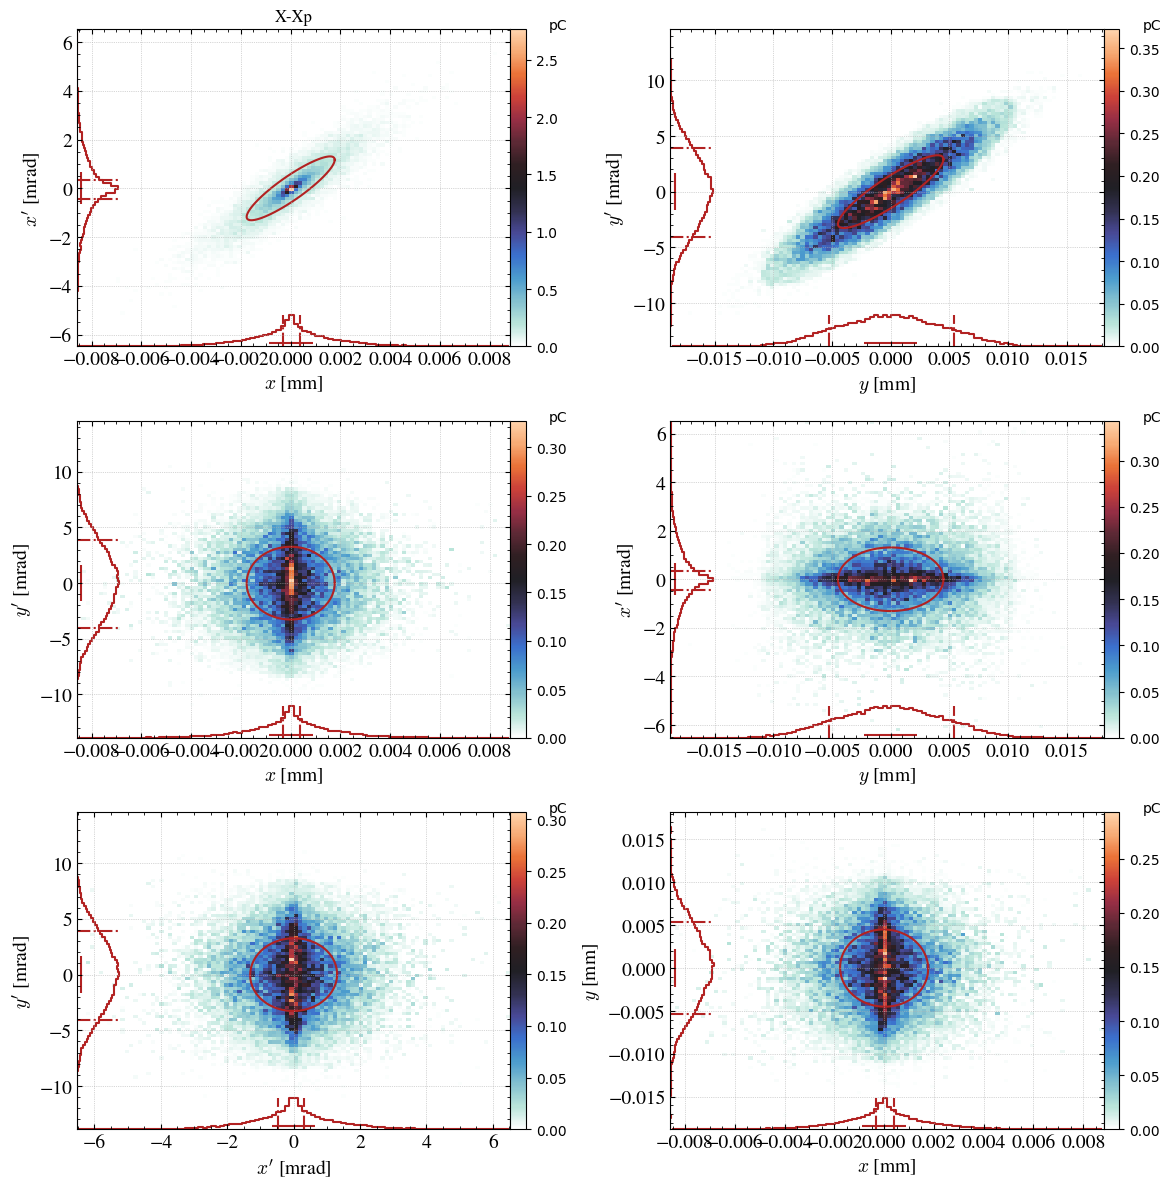

In [15]:
with plt.rc_context(twissed.rcParams): # Figure formatting
    fig, axs = plt.subplots(3,2, figsize=(12,12), dpi=100, tight_layout=True)

# fig.suptitle(f"Beam energy with various options")

ax = axs[0,0]
_ = step.hist2D(
    'x',
    'xp',
    xconv='mm',
    yconv='mrad',
    range_auto=True,
    ax=ax,
)
_ = ax.set_title(f"X-Xp")

ax = axs[0,1]
_ = step.hist2D(
    'y',
    'yp',
    xconv='mm',
    yconv='mrad',
    range_auto=True,
    ax=ax,
)

ax = axs[1,0]
_ = step.hist2D(
    'x',
    'yp',
    xconv='mm',
    yconv='mrad',
    range_auto=True,
    ax=ax,
)

ax = axs[1,1]
_ = step.hist2D(
    'y',
    'xp',
    xconv='mm',
    yconv='mrad',
    range_auto=True,
    ax=ax,
)

ax = axs[2,0]
_ = step.hist2D(
    'xp',
    'yp',
    xconv='mrad',
    yconv='mrad',
    range_auto=True,
    ax=ax,
)

ax = axs[2,1]
_ = step.hist2D(
    'x',
    'y',
    xconv='mm',
    yconv='mm',
    range_auto=True,
    ax=ax,
)